In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [17]:
from PIML.box.boxWR import BoxWR

In [18]:
b = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [1944.315991576552, 811.9445168311001, 424.68900323796925, 234.3404175471389, 154.91914209869185, 125.07865060141401, 104.60175471373115, 56.85155713226598, 31.705648387719233, 14.249934911915783, 9.559100224014493]
Top10 eigs [1.9403e+02 1.4640e+01 5.7500e+00 1.8700e+00 9.3000e-01 7.3000e-01
 6.0000e-01 3.4000e-01 2.4000e-01 1.7000e-01]
Building RBF with gaussan kernel on data shape (5760,)
Building RBF with gaussan kernel on data shape (5760, 10)


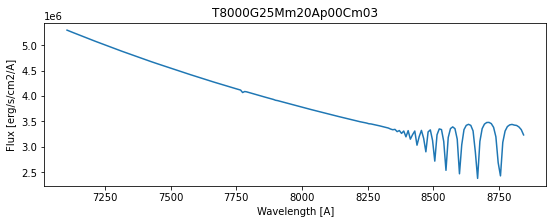

In [19]:
W="RedM"; R="B"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

In [20]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(14.392874047866847, 46.95862252662324)

In [21]:
diff_10k_100, bias_10k_100, bX = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30 = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100 = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100


In [9]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

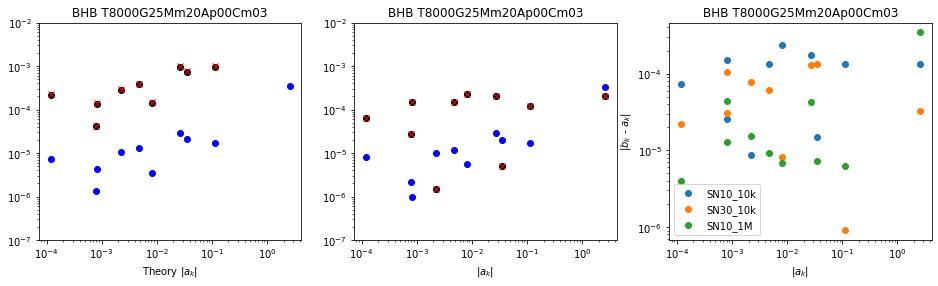

In [22]:
b.plot_bias_evals(diffs, bias_1M_100, bX, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

In [11]:
ak = b.rbf_coeff(b.PhyMid)

In [12]:
ak

array([-2.57366817e+00,  1.14072671e-01, -3.46437548e-02, -2.68161981e-02,
        4.74299086e-03, -8.11526993e-03, -2.24919024e-03,  1.19151001e-04,
        8.22789128e-04,  7.98247409e-04])

In [13]:
b.save_ak()